In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (4, 3)

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
import pandas as pd

### Explore the dataset

#### Clinical data

We start with an inspection of the data. These are only the clinical data, then we will dive into the CGM ones.

In [13]:
from download_data import read_clinical_data_and_labels, read_raw_clinical_data
X, y = read_clinical_data_and_labels(path='../')
df_tot = X.copy()
df_tot['lbl'] = y

In [15]:
X = read_raw_clinical_data(path='../')
y = X["T2DM"].values

In [5]:
from problem import get_train_data, get_test_data

X_train, y_train = get_train_data(path='../')
X_test, y_test = get_test_data(path='../')

print(f"Number of DT2 diagnosed patients in the training set: {str(y_train.sum()/len(y_train) * 100)[0]}/{len(y_train)}")
print(f"Number of DT2 diagnosed patients in the test set: {str(y_test.sum()/len(y_test) * 100)[0]}/{len(y_test)}")

Number of DT2 diagnosed patients in the training set: 7/139
Number of DT2 diagnosed patients in the test set: 8/69


In [16]:
X.head()

,gender,age,BMI,glycaemia,HbA1c,T2DM
1,1,77,25.4,106,6.3,False
2,0,42,30.0,92,5.8,False
3,0,61,33.8,114,5.5,False
4,0,67,26.7,110,6.0,False
5,1,53,25.8,106,5.2,False


- **gender** : gender of the patient (1 : woman, 0 : man)
- **age** : age of the patient (in years)
- **BMI** : body mass index, in $kg/m^2$ ($weight/height^2$)
- **glycaemia** : basal glycaemia (mg/dL) 

**Univariate statistics**

We can note with the descriptive statistics table that we have approximately the same number of men and women in our dataset. The patients are almost 60 years old in mean (the youngest is 29, the older, 88). 50% of them have a body mass index inferior to 29, the values varying between 18 and 48. For glycaemia, the mean is around 100mg/dL, with a minimum at 78 and a maximum at 135.

In [18]:
X.describe()

,gender,age,BMI,glycaemia,HbA1c
count,208.000000,208.000000,207.000000,208.000000,200.000000
mean,0.504808,59.600962,29.993237,100.581731,5.763500
std,0.501183,10.094692,4.738661,11.407814,0.295558
min,0.000000,29.000000,18.100000,78.000000,5.100000
25%,0.000000,54.000000,27.000000,92.000000,5.600000
50%,1.000000,61.000000,29.300000,101.000000,5.800000
75%,1.000000,66.000000,32.400000,108.000000,6.000000
max,1.000000,88.000000,48.700000,135.000000,6.500000


In [19]:
X['gender'].value_counts()

1    105
0    103
Name: gender, dtype: int64

<AxesSubplot:ylabel='glycaemia'>

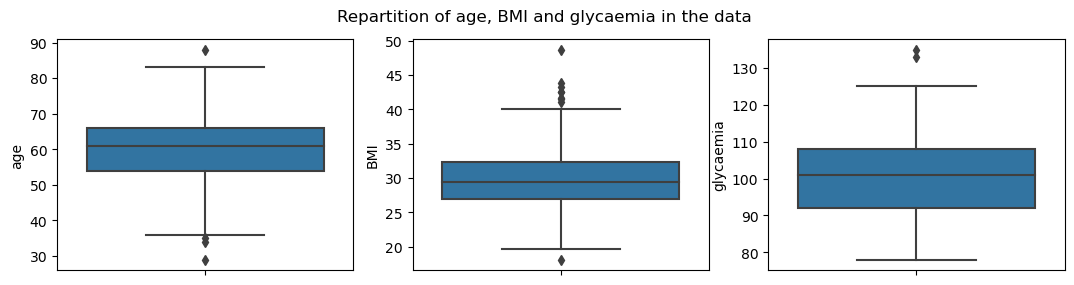

In [9]:
plt.figure(figsize=(13,3))
plt.suptitle("Repartition of age, BMI and glycaemia in the data")
plt.subplot(1,3,1)
sns.boxplot(data=df_tot, y="age")
plt.subplot(1,3,2)
sns.boxplot(data=df_tot, y="BMI")
plt.subplot(1,3,3)
sns.boxplot(data=df_tot, y="glycaemia")

*Remark* :
- the body mass index is often interpreted with the following range of values : underweight (under 18.5 kg/m2), normal weight (18.5 to 24.9), overweight (25 to 29.9), and obese (30 or more). According to our data, the analysed patients are mostly in overweight.
- the value of glycaemia depends strongly on the moment of measurement (be fasting or having eaten before the measurement). A basal glycaemia (be fasting) is considered normal between 70 and 110mg/dL (approximately what we observe on our data, which is consistent with the high number of non-diabetic patients in our data).

$\underline{\text{Label variable}} :$ 1 if the patient has been diagnosed type 2 diabetic / 0 if not

As we can see, our dataset is clearly desequilibrated, with a low number of diagnosed diabetic patients.

In [10]:
df_tot['lbl'].value_counts()

0    191
1     17
Name: lbl, dtype: int64

In [11]:
print("ids of diabetic patients", df_tot[df_tot['lbl']==1].index)

ids of diabetic patients Int64Index([22, 23, 25, 28, 31, 56, 85, 92, 120, 152, 154, 156, 160, 171, 184,
            190, 194],
           dtype='int64')


**Bivariate statistics**

We can first compare the distribution of the different variables according to diabetic-non diabetic diagnostic.
As our data is desequilibrated, we can plot the distributions separting the data between T2DM and non T2DM patients.

<AxesSubplot:xlabel='BMI', ylabel='Percent'>

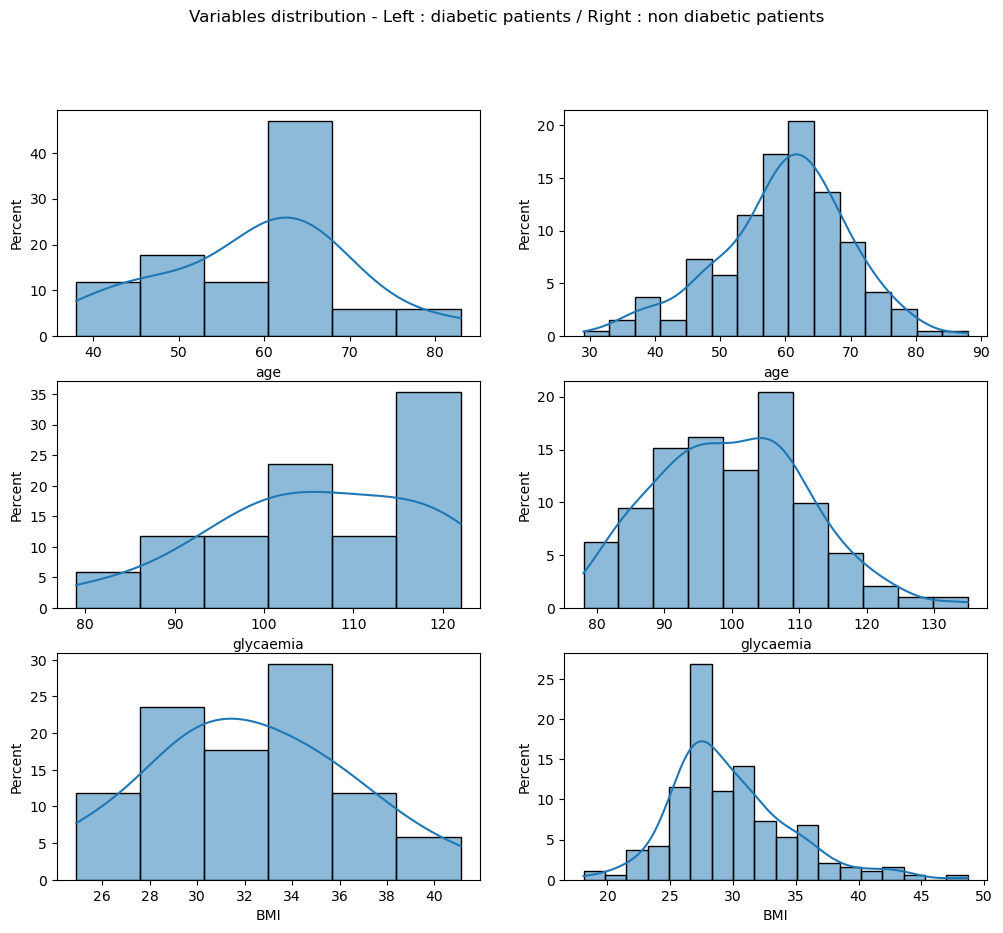

In [41]:
plt.figure(figsize=(12, 10))
plt.suptitle("Variables distribution - Left : diabetic patients / Right : non diabetic patients")
plt.subplot(3,2,1)
sns.histplot(data=X[X['T2DM']==True], x='age', stat="percent", kde=True)
plt.subplot(3,2,2)
sns.histplot(data=X[X['T2DM']==False], x='age', stat="percent", kde=True)
plt.subplot(3,2,3)
sns.histplot(data=X[X['T2DM']==True], x='glycaemia', stat="percent", kde=True)
plt.subplot(3,2,4)
sns.histplot(data=X[X['T2DM']==False], x='glycaemia', stat="percent", kde=True)
plt.subplot(3,2,5)
sns.histplot(data=X[X['T2DM']==True], x='BMI', stat="percent", kde=True)
plt.subplot(3,2,6)
sns.histplot(data=X[X['T2DM']==False], x='BMI', stat="percent", kde=True)

(TO COMMENT)

We can also look at the potential relationship between the clinical variables, highlighting if the patient has diabete or not. 
First, we see on the scatter plots that no strong correlations appear in our data, meaning that on the 208 patients, BMI, age and basal glycaemia values are not particularly correlated.

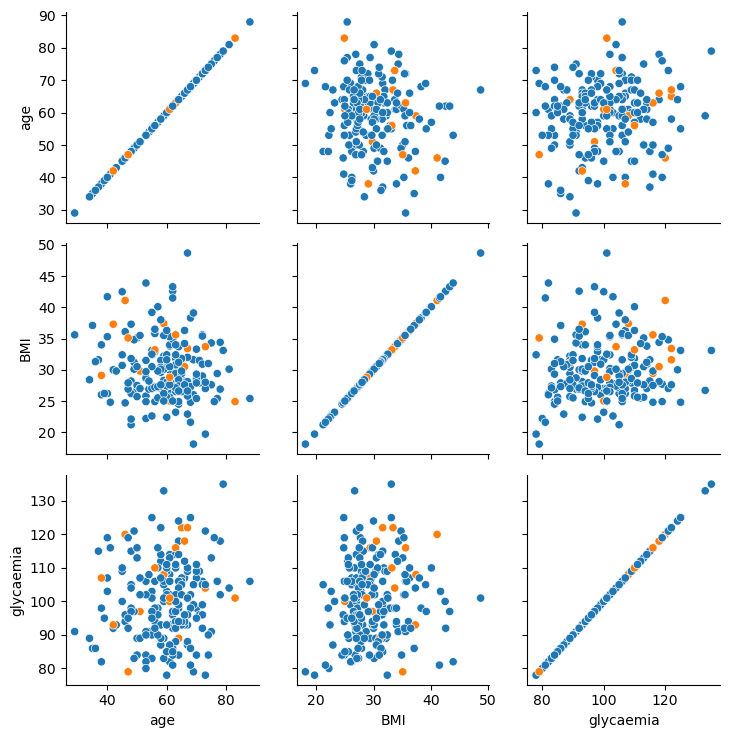

In [54]:
g = sns.PairGrid(X.drop(["gender", "HbA1c"], axis=1), hue="T2DM")
g.map(sns.scatterplot)

We can also compute the corresponding correlation coefficients, on the data composed of all patients, then on diabetic patients data and non diabetic patients data.
The correlation values are really low, except for diabetic patients, for which we obtain correlation coefficients of a higher intensity. However, since we only have 17 diabetic patients, these values are not really relevant to study correlations.

<AxesSubplot:title={'center':'Correlation matrix, non diabetic patients'}>

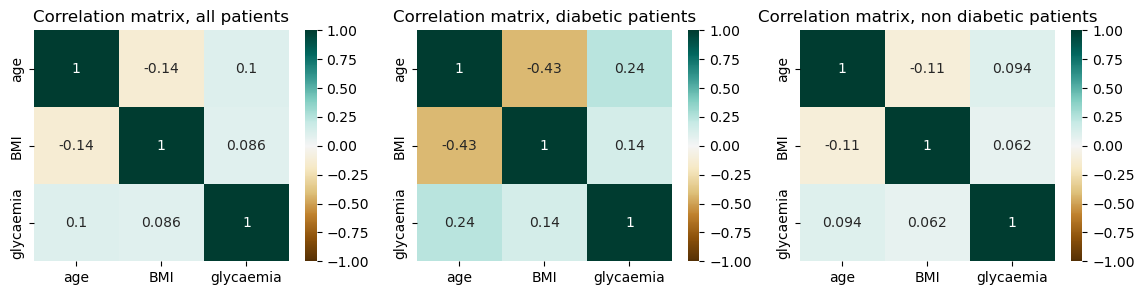

In [56]:
plt.figure(figsize=(14, 3))
plt.subplot(1,3,1)
plt.title("Correlation matrix, all patients")
sns.heatmap(data=X.iloc[:,1:4].corr(), vmin=-1, vmax=1, cmap="BrBG", annot=True)
plt.subplot(1,3,2)
plt.title("Correlation matrix, diabetic patients")
sns.heatmap(data=X[X['T2DM']==True].iloc[:,1:4].corr(), vmin=-1, vmax=1, cmap="BrBG", annot=True)
plt.subplot(1,3,3)
plt.title("Correlation matrix, non diabetic patients")
sns.heatmap(data=X[X['T2DM']==False].iloc[:,1:4].corr(), vmin=-1, vmax=1, cmap="BrBG", annot=True)

TODO
rapport corrélation alexandra

#### Focus on the HbA1c

Another variable available in the clinical data is the HbA1c, glycohemoglobin,a form of hemoglobin chemically linked to a sugar. The typical diagnosis of diabetes is done through HbA1c blood measurement, which characterizes the glucose value over 3 months. Above the threshold of 6.5% (approximately and depending on the references), people are characterized diabetic people (as explained in the paper).

One can import the HbA1c measurements of the individual in our dataset. A statistical study is then proceeded.

In [22]:
from download_data import read_raw_clinical_data

def get_HbA1c_and_labels_data(path='.'):
    # First we fetch the clinical data
    clinical_data = read_raw_clinical_data(path)
    # Then we output the HbA1c and the labels dataframe, for each user, may it be missing or not
    return clinical_data[["HbA1c", "T2DM"]]

df_hba1c = get_HbA1c_and_labels_data(path='../')
df_hba1c.head()

,HbA1c,T2DM
1,6.3,False
2,5.8,False
3,5.5,False
4,6.0,False
5,5.2,False


<AxesSubplot:title={'center':'Boxplot of HbA1c for diabetic and non diabetic patients'}, xlabel='T2DM', ylabel='HbA1c'>

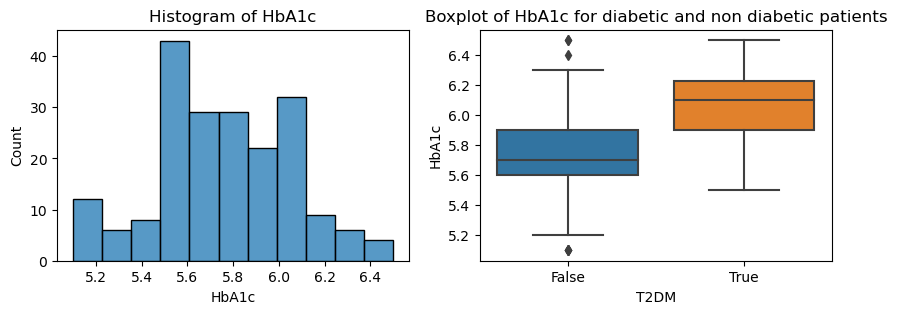

In [23]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.title("Histogram of HbA1c")
sns.histplot(data=df_hba1c, x="HbA1c")
plt.subplot(1,2,2)
plt.title("Boxplot of HbA1c for diabetic and non diabetic patients")
sns.boxplot(data=df_hba1c, x="T2DM", y="HbA1c")

As expected, the repartition of HbA1c values is different if the patient is diabetic or not. As explained before, since the diagnosis of diabete depends strongly on this value (furthermore obtained with an invasise blood measurement), the objective is to get rid of this variable when trying to predict Type 2 diabete disease.